# Rotations

In this notebook, the NN learns learns the 2d rotation matrix, parameterized by the generator of rotations in two dimensions:

$R={\begin{bmatrix}\cos \theta &-\sin \theta \\\sin \theta &\cos \theta \\\end{bmatrix}}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import torch
import torch.nn as nn
from torch.autograd import Variable

cmap=plt.cm.tab10
c = cycler('color', cmap(np.linspace(0,1,10)))
plt.rcParams["axes.prop_cycle"] = c
plt.style.use('ggplot')

%matplotlib notebook
%matplotlib notebook

In [99]:
%matplotlib notebook

In [318]:
class Rotations(nn.Module):
    def __init__(self):
        super(Rotations, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(3,300,bias=True),
            nn.LeakyReLU(),
            nn.Linear(300,300,bias=False),
            nn.LeakyReLU(),
            nn.Linear(300,300,bias=False),
            nn.LeakyReLU(),
            nn.Linear(300,2,bias=False))
        
    def forward(self, x):
        out = self.layer1(x)
        return out

In [319]:
model = Rotations()
model.cuda()
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
criterion = nn.MSELoss()
total_loss = []

In [320]:
model

Rotations(
  (layer1): Sequential(
    (0): Linear(in_features=3, out_features=300)
    (1): LeakyReLU(0.01)
    (2): Linear(in_features=300, out_features=300)
    (3): LeakyReLU(0.01)
    (4): Linear(in_features=300, out_features=300)
    (5): LeakyReLU(0.01)
    (6): Linear(in_features=300, out_features=2)
  )
)

In [321]:
num_samples = 60000
for k in range(num_samples):
    
    # =================== data calc ===================
    x = torch.randn(2)
    theta = 10*torch.rand(1)
    data = torch.cat((x,theta))
    
    R = torch.zeros(2,2)
    R[0,:] = torch.Tensor([np.cos(theta[0]),-np.sin(theta[0])])
    R[1,:] = torch.Tensor([np.sin(theta[0]), np.cos(theta[0])])

    data, target = Variable(data).cuda(), Variable(torch.mv(R,x)).cuda()
    
    # =================== forward =====================
    output = model(data)
    loss   = criterion(output, target)

    # =================== backward ====================
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # =================== log ========================
    total_loss.append(loss.data[0])
    if (k+1)%(num_samples//10)==0:
        print('[{}] loss: {:.5f}'
              .format(k+1, total_loss[-1]))
    

[6000] loss: 0.03236
[12000] loss: 0.00804
[18000] loss: 0.10239
[24000] loss: 0.07521
[30000] loss: 0.04881
[36000] loss: 0.02538
[42000] loss: 0.03228
[48000] loss: 0.00287
[54000] loss: 0.13811
[60000] loss: 0.00252


<IPython.core.display.Javascript object>


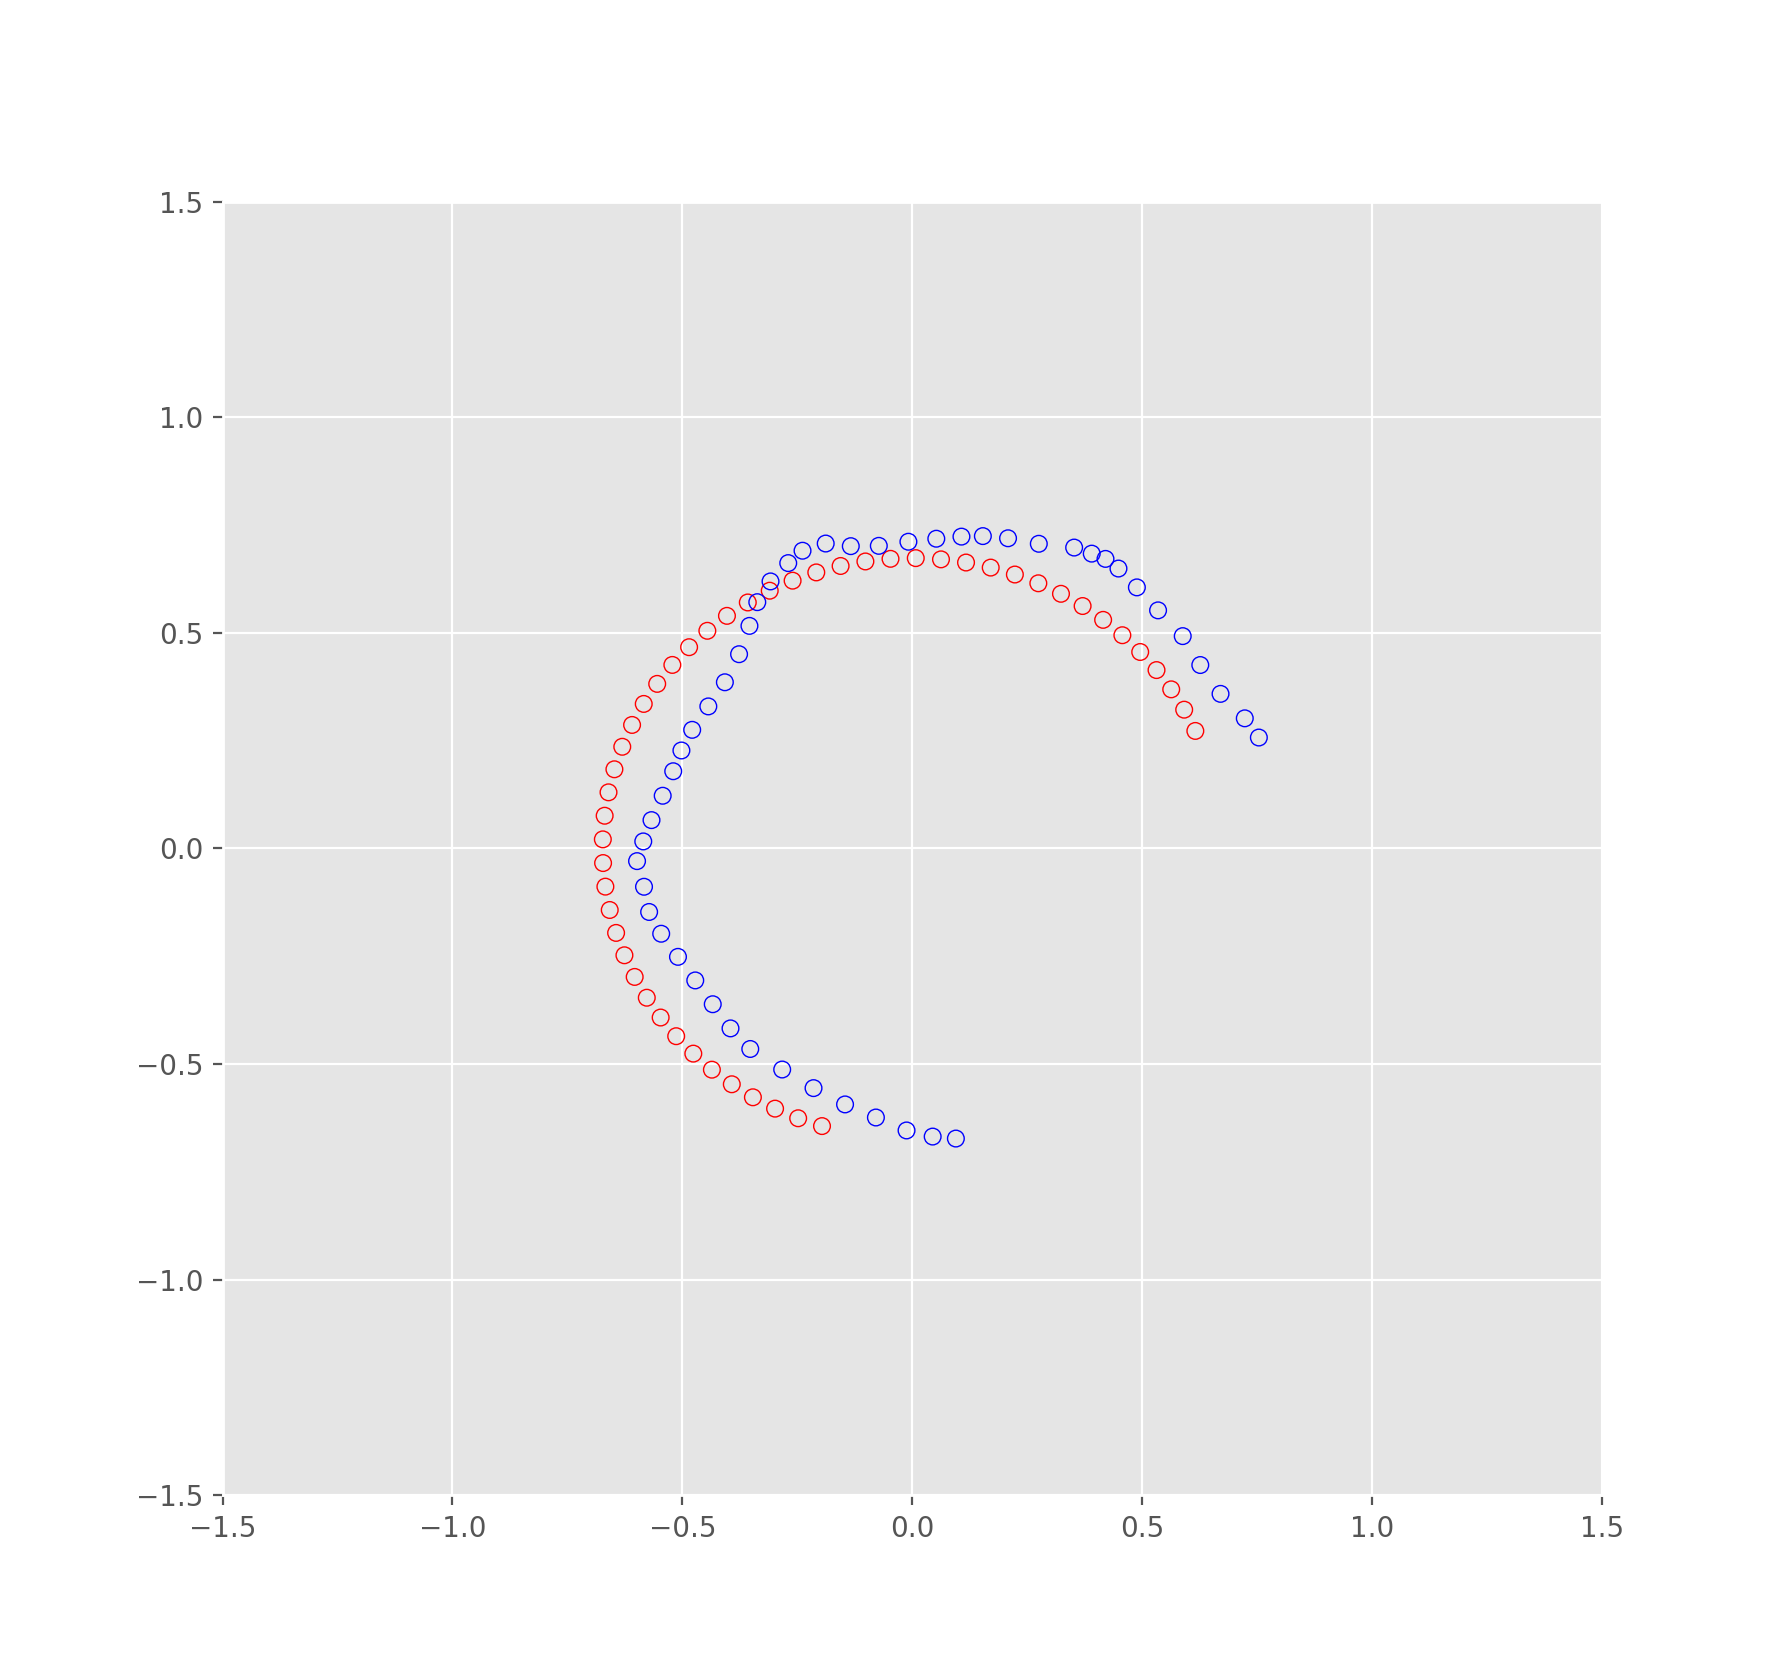

In [326]:
fig, ax = plt.subplots(figsize=(9,9))

x = torch.rand(2)

for theta in np.linspace(0,4,50):
    data   = Variable(torch.Tensor([x[0],x[1],theta])).cuda()
    output = model(data)
    
    R = torch.zeros(2,2)
    R[0,:] = torch.Tensor([np.cos(theta),-np.sin(theta)])
    R[1,:] = torch.Tensor([np.sin(theta), np.cos(theta)])

    real = torch.mv(R,x)
    modeld = output.data
    
    ax.scatter(real[0],real[1], facecolors='none', edgecolors='r')
    ax.scatter(modeld[0],modeld[1], facecolors='none', edgecolors='b')
    
ax.set_ylim(-1.5,1.5)
ax.set_xlim(-1.5,1.5);

In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))